In [1]:
import pandas
import matplotlib.pyplot as plt
from numpy import arange
unrate = pandas.read_csv('csv/unrate.csv')
reviews = pandas.read_csv('csv/fandango_scores.csv')
selected = ['FILM',
           'RT_user_norm', 
           'Metacritic_user_nom',
           'IMDB_norm',
           'Fandango_Ratingvalue',
           'Fandango_Stars']           
norm_reviews = reviews[selected]

# Line Chart

In [2]:
unrate['DATE'] = pandas.to_datetime(unrate['DATE'])
unrate['DATE'].head()

0   1948-01-01
1   1948-02-01
2   1948-03-01
3   1948-04-01
4   1948-05-01
Name: DATE, dtype: datetime64[ns]

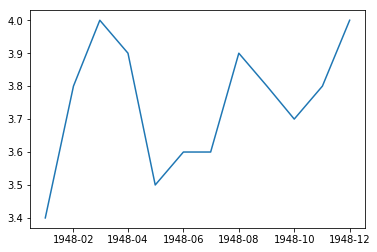

In [3]:
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))
plt.show()
# every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). 
# When we call show(), the plot is displayed and the internal state is destroyed.

The `xticks()` function within pyplot lets you customize the behavior of the x-axis ticks. 

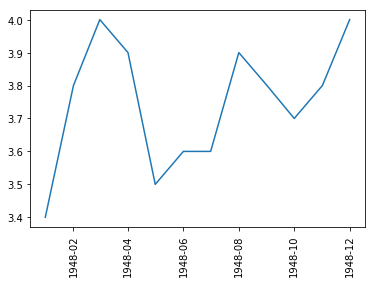

In [4]:
plt.xticks(rotation=90)
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))
plt.show()

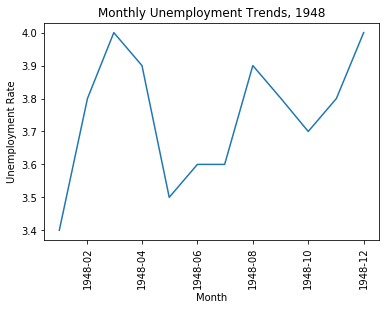

In [5]:
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))
plt.show()

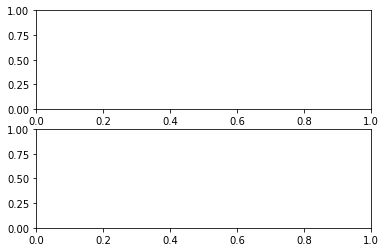

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

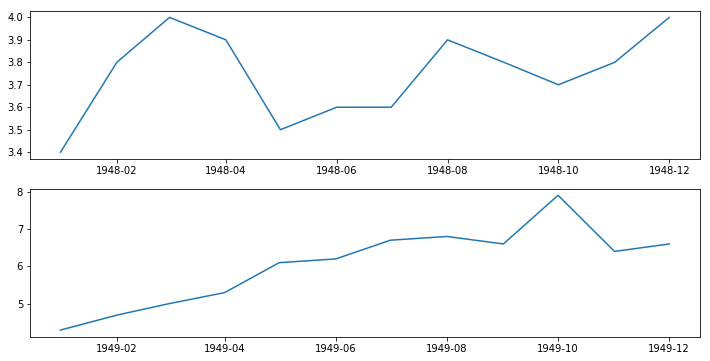

In [7]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
plt.show()

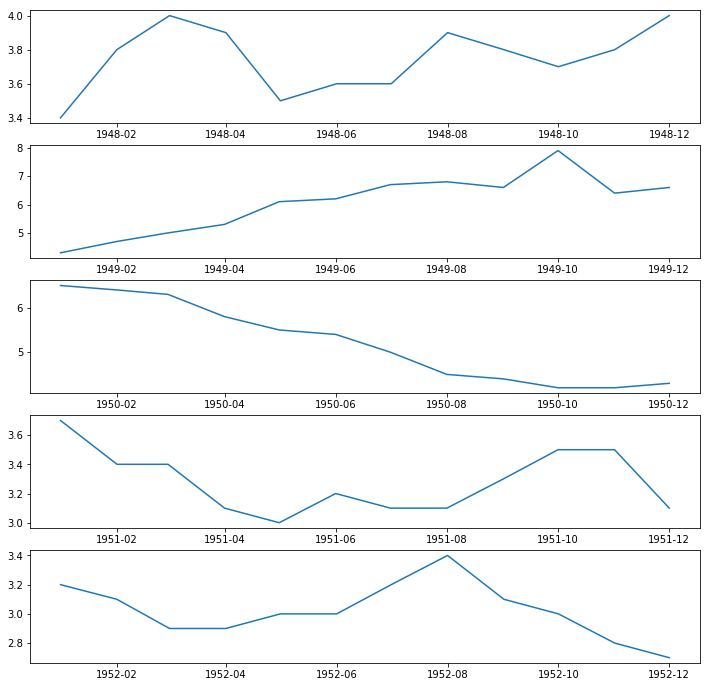

In [8]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

If we call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot.

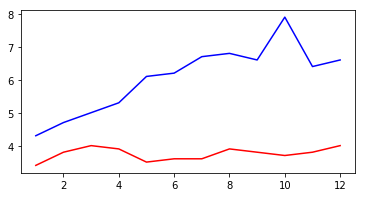

In [9]:
unrate['MONTH'] = unrate['DATE'].dt.month
# Calling pandas.Series.dt.month returns a Series containing the integer values for each month 
# (e.g. 1 for January, 2 for February, etc.). 
# Under the hood, pandas applies the datetime.date function over each datetime value in the DATE column, 
#which returns the integer month value.
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.show()

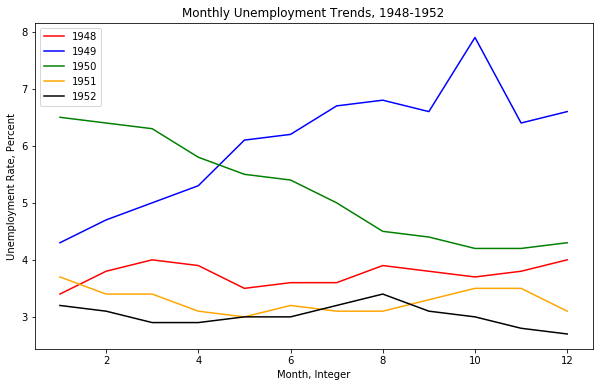

In [10]:
fig = plt.figure(figsize=(10,6))
cs = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=cs[i], label=str(1948+i))
    plt.legend(loc='upper left')
    plt.title("Monthly Unemployment Trends, 1948-1952")
    plt.xlabel("Month, Integer")
    plt.ylabel("Unemployment Rate, Percent")
plt.show()

# Bar Chart
To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:

![matplotlib_barplot_positioning](images/matplotlib_barplot_positioning.png)

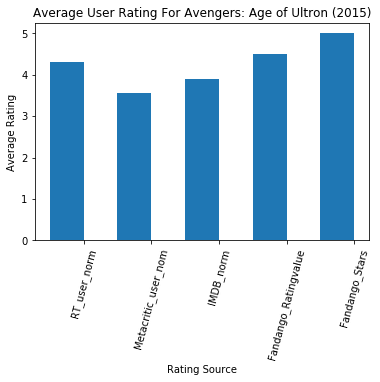

In [11]:
fig, ax = plt.subplots()

# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 0.75

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values

ax.bar(bar_positions, bar_heights, width=0.5)

tick_positions = range(1,6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=75)
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

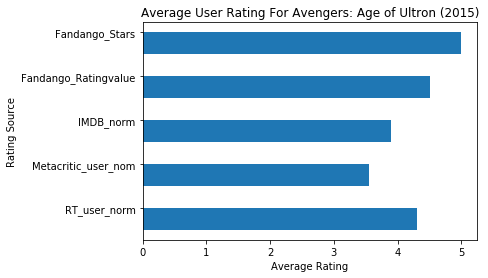

In [12]:
fig, ax = plt.subplots()

# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 0.75

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_widths = norm_reviews[num_cols].iloc[0].values

ax.barh(bar_positions, bar_heights, height=0.5)

tick_positions = arange(5) + 1
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

# Scatter Chart
A scatter plot helps us determine if 2 columns are weakly or strongly correlated.

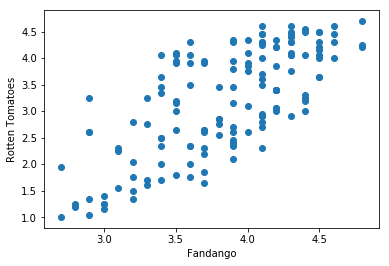

In [13]:
fig, ax = plt.subplots()

ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

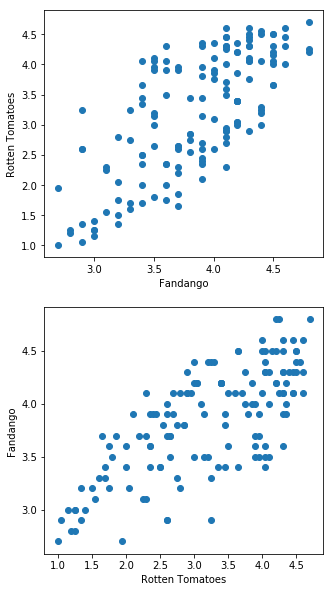

In [14]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

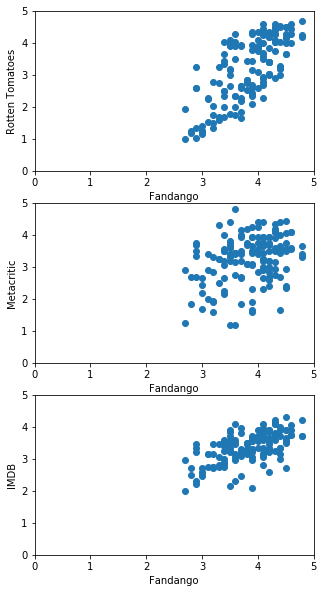

In [15]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

# Histogram

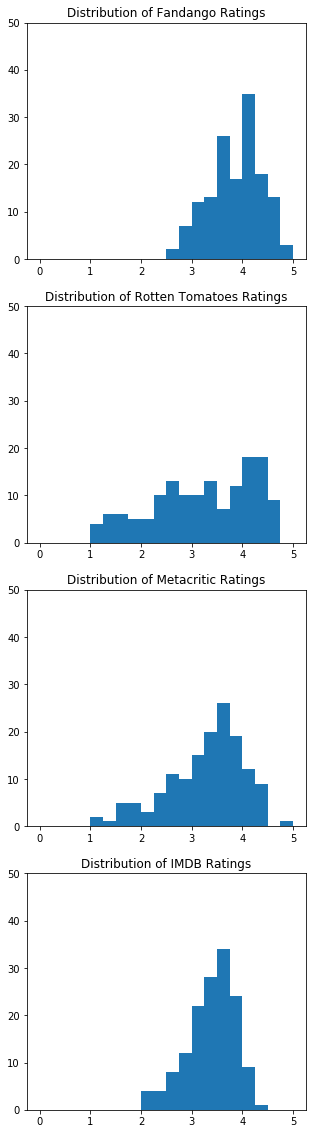

In [23]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

# Box
A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way.
![boxplot_intro](images/boxplot_intro.png)

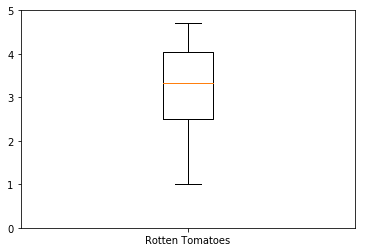

In [24]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

- the bottom 25% of user ratings range from around 1 to 2.5
- the top 25% of of user ratings range from around 4 to 4.6

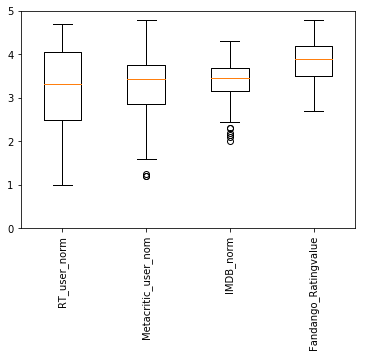

In [25]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()